In [110]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
import pandas as pd
from tifffile import imread, memmap

from caImageAnalysis import BrukerFish
from caImageAnalysis.utils import rotate_image
from caImageAnalysis.visualize import visualize_images, visualize_volumes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Change the exp_folder to the path of the experiment

In [144]:
# Change this path to the experiment folder
exp_folder = r'/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_18_20231206'
region = ''

In [145]:
# Initialize BrukerFish
fish = BrukerFish(exp_folder, region=region)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

{'raw': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_18_20231206/vagal_R-000'),
 'anatomy': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_18_20231206/vagal_R-000/vagal_R-000_Cycle01175_Ch2_000001.ome.tif'),
 'log': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_18_20231206/vagal_R-000/vagal_R-000.xml'),
 'voltage_output': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_18_20231206/vagal_R-000/vagal_R-000_Cycle00001_VoltageOutput_001.xml'),
 'references': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_18_20231206/vagal_R-000/References')}

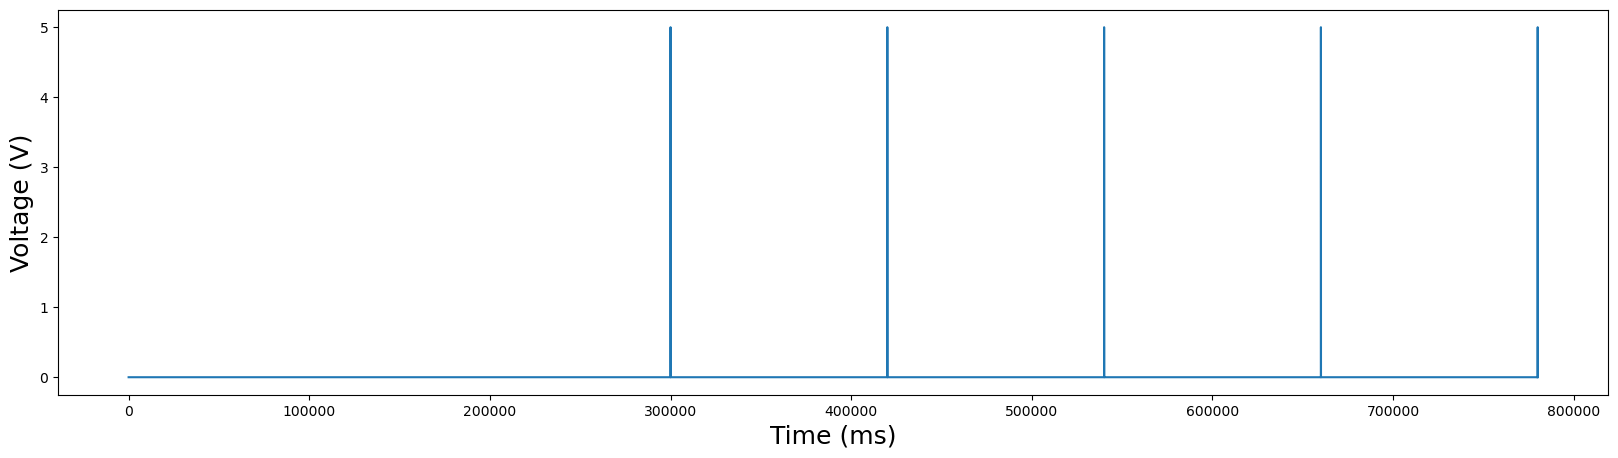

In [146]:
# Plots the Voltage Output waveform of the experiment
if 'voltage_output' in fish.data_paths.keys():
    fish.voltage_output.get_waveform(plot=True)
elif 'markpoints' in fish.data_paths.keys():
    first_cycle = list(fish.markpoints.keys())[0]
    fish.markpoints[first_cycle].get_waveform(plot=True)

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:188: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 188 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)


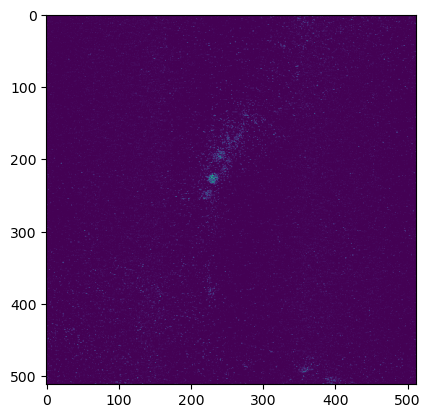

In [147]:
# If running for the first time, create a combined frametimes.txt and combined tif files
fish.create_frametimes_txt()
fish.combine_channel_images('Ch2')

In [148]:
# Check the combined image. If needed, rotate the raw image by angle.
if 'markpoints' in fish.data_paths.keys() or 'vagal_R' in fish.data_paths['raw'].name:
    # coordinate conversion is a pain, rotate the image later
    # and vagal_R is collected in the correct orientation
    pass
else:
    if 'vagal_L' in fish.data_paths['raw'].name:
        angle = 180
    elif 'hindbrain' or 'inferior_raphe' in fish.data_paths['raw'].name:
        angle = 90

    fish.rotate_image(fish.data_paths['raw_image'], angle=angle)

In [149]:
# When the rotation angle is accurate, also rotate and create the anatomy.tif stack
if 'markpoints' in fish.data_paths.keys() or 'vagal_R' in fish.data_paths['raw'].name:
    # coordinate conversion is a pain, rotate the image later
    # and vagal_R is collected in the correct orientation
    pass
else:
    anatomy_img = imread(fish.data_paths['anatomy'])
    anatomy_img_rotated = rotate_image(anatomy_img, path=fish.exp_path.joinpath('anatomy.tif'), angle=angle)
    fish.process_filestructure()

    plt.imshow(anatomy_img_rotated[0])

In [150]:
# Split the raw volumetric image to individual planes
# If it's not volumetric, creates a frametimes.h5 file in the exp_path
if fish.volumetric:
    fish.split_bruker_volumes('Ch2')
else:
    frametimes = fish.frametimes_df.copy()
    frametimes.reset_index(drop=True)
    if len(fish.region) > 0:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'{region}_frametimes.h5'), 'frametimes')
    else:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'frametimes.h5'), 'frametimes')
    fish.process_filestructure()

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  plane_frametimes.to_hdf(os.path.join(plane_folder_path, 'frametimes.h5'), 'frametimes')
/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the Beautiful

In [151]:
fish.frametimes_df

,time,pulse
0,14:56:34,0
1,14:56:34.153384,0
2,14:56:34.306768,0
3,14:56:34.460152,0
4,14:56:34.613535,0
...,...,...
5865,15:11:33.596409,5
5866,15:11:33.749793,5
5867,15:11:33.903177,5
5868,15:11:34.056561,5


## Visualize plane(s)

In [152]:
if fish.volumetric:
    iw = visualize_volumes(fish)
else:
    img = memmap(fish.data_paths['raw_image'])
    iw = visualize_images(imgs=img)

iw.show()

RFBOutputContext()

No such comm: 07bc9dbd769041edac9bb679f9a96c4f
No such comm: 07bc9dbd769041edac9bb679f9a96c4f
No such comm: 07bc9dbd769041edac9bb679f9a96c4f
No such comm: 07bc9dbd769041edac9bb679f9a96c4f
No such comm: 07bc9dbd769041edac9bb679f9a96c4f
No such comm: 07bc9dbd769041edac9bb679f9a96c4f
No such comm: 07bc9dbd769041edac9bb679f9a96c4f


In [153]:
iw.plot.canvas.close()